<a href="https://colab.research.google.com/github/jayanthbagare/finpy/blob/main/mean_reversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# !pip install distfit
# !pip install mplcursors

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import scipy as sp
import os
import mplcursors
from distfit import distfit

In [5]:
if not os.path.isfile("gold_monthly.csv"):
    df_gold_raw = pd.read_csv("gold_daily.csv")
    df_gold = df_gold_raw[['Date','Price','Chg%']]

    # Gold Collapse to monthly and calculate %chg
    df_gold['Date'] = pd.to_datetime(df_gold['Date'])
    df_gold = df_gold.set_index('Date')
    gold_mean = df_gold['Price'].resample('ME').mean()
    df_gold_monthly = gold_mean.reset_index()
    df_gold_monthly.rename(columns={'index':'Month_End_Date'},inplace=True)
    df_gold_monthly['%Chg'] = (df_gold_monthly['Price'].pct_change() * 100).map('{:.2f}'.format)
    df_gold_monthly.to_csv("gold_monthly.csv")
else:
    df_gold_monthly = pd.read_csv("gold_monthly.csv",index_col=[0])

gold_min_date = df_gold_monthly['Date'].min()
gold_max_date = df_gold_monthly['Date'].max()
print(f'Min and Max Dates of Gold Dataset is {gold_min_date},{gold_max_date}')

min_date = [gold_min_date]
max_date = [gold_max_date]

Min and Max Dates of Gold Dataset is 2014-01-31,2025-01-31


In [6]:
if not os.path.isfile("silver_monthly.csv"):
    df_silver = pd.read_csv("silver_daily.csv")

    # Silver Collapse to monthly and calculate %chg
    df_silver['Date'] = pd.to_datetime(df_silver['Date'])
    df_silver = df_silver.set_index('Date')
    silver_mean = df_silver['Price'].resample('ME').mean()
    df_silver_monthly = silver_mean.reset_index()
    df_silver_monthly.rename(columns={'index':'Month_End_Date'},inplace=True)
    df_silver_monthly['%Chg'] = (df_silver_monthly['Price'].pct_change() * 100).map('{:.2f}'.format)
    df_silver_monthly.to_csv("silver_monthly.csv")
else:
    df_silver_monthly = pd.read_csv("silver_monthly.csv",index_col=[0])

silver_min_date = df_silver_monthly['Date'].min()
silver_max_date = df_silver_monthly['Date'].max()
print(f'Min and Max Dates of Silver Dataset is {silver_min_date},{silver_max_date}')
min_date.append(silver_min_date)
max_date.append(silver_max_date)

Min and Max Dates of Silver Dataset is 2014-01-31,2025-06-30


In [7]:
if not os.path.isfile("nifty500_monthly.csv"):
    df_nifty500 = pd.read_csv("nifty500_daily.csv",usecols=['date','close'])
    df_nifty500 = df_nifty500.rename(columns={'date':'Date','close':'Price'})

    # Nifty500 Collapse to monthly and calculate %chg
    df_nifty500['Date'] = pd.to_datetime(df_nifty500['Date'])
    df_nifty500 = df_nifty500.set_index('Date')
    nifty500_mean = df_nifty500['Price'].resample('ME').mean()
    df_nifty500_monthly = nifty500_mean.reset_index()
    df_nifty500_monthly.rename(columns={'index':'Month_End_Date'},inplace=True)
    df_nifty500_monthly['%Chg'] = (df_nifty500_monthly['Price'].pct_change() * 100).map('{:.2f}'.format)
    df_nifty500_monthly.to_csv("nifty500_monthly.csv")
else:
    df_nifty500_monthly = pd.read_csv("nifty500_monthly.csv",index_col=[0])

nifty500_min_date = df_nifty500_monthly['Date'].min()
nifty500_max_date = df_nifty500_monthly['Date'].max()
print(f'Min and Max Dates of Nifty500 Dataset is {nifty500_min_date},{nifty500_max_date}')
min_date.append(nifty500_min_date)
max_date.append(nifty500_max_date)

Min and Max Dates of Nifty500 Dataset is 2015-01-31,2025-02-28


In [8]:
if not os.path.isfile("real_estate_monthly.csv"):
    df_real_estate = pd.read_csv('real_estate_monthly.csv')
    # Real Estate Collapse to monthly and calculate %chg
    df_real_estate['Date'] = pd.to_datetime(df_real_estate['Date'])
    df_real_estate = df_real_estate.set_index('Date')
    real_estate_mean = df_real_estate['Price'].resample('ME').mean()
    df_real_estate_monthly = real_estate_mean.reset_index()
    df_real_estate_monthly.rename(columns={'index':'Month_End_Date'},inplace=True)
    df_real_estate_monthly['%Chg'] = (df_real_estate_monthly['Price'].pct_change() * 100).map('{:.2f}'.format)
    df_real_estate_monthly.to_csv("real_estate_monthly.csv")
else:
    df_real_estate_monthly = pd.read_csv("real_estate_monthly.csv",index_col=[0])

real_estate_min_date = df_real_estate_monthly['Date'].min()
real_estate_max_date = df_real_estate_monthly['Date'].max()
print(f'Min and Max Dates of Real Estate Dataset is {real_estate_min_date},{real_estate_max_date}')
min_date.append(real_estate_min_date)
max_date.append(real_estate_max_date)

Min and Max Dates of Real Estate Dataset is 2017-01-31,2025-03-31


In [9]:
start_date = max(min_date)
end_date = min(max_date)

In [10]:
df_gold_final = df_gold_monthly[(df_gold_monthly['Date'] >= start_date) & (df_gold_monthly['Date'] <= end_date)]
df_silver_final = df_silver_monthly[(df_silver_monthly['Date'] >= start_date) & (df_silver_monthly['Date'] <= end_date)]
df_nifty500_final = df_nifty500_monthly[(df_nifty500_monthly['Date'] >= start_date) & (df_nifty500_monthly['Date'] <= end_date)]
df_real_estate_final = df_real_estate_monthly[(df_real_estate_monthly['Date'] >= start_date) & (df_real_estate_monthly['Date'] <= end_date)]

In [11]:
df_gold_final = df_gold_final.reset_index(drop=True)
df_silver_final = df_silver_final.reset_index(drop=True)
df_nifty500_final = df_nifty500_final.reset_index(drop=True)
df_real_estate_final = df_real_estate_final.reset_index(drop=True)

In [12]:
local_mean = np.array([df_gold_final['%Chg'].mean(),df_silver_final['%Chg'].mean(),df_nifty500_final['%Chg'].mean(),df_real_estate_final['%Chg'].mean()])
global_mean = np.mean(local_mean)

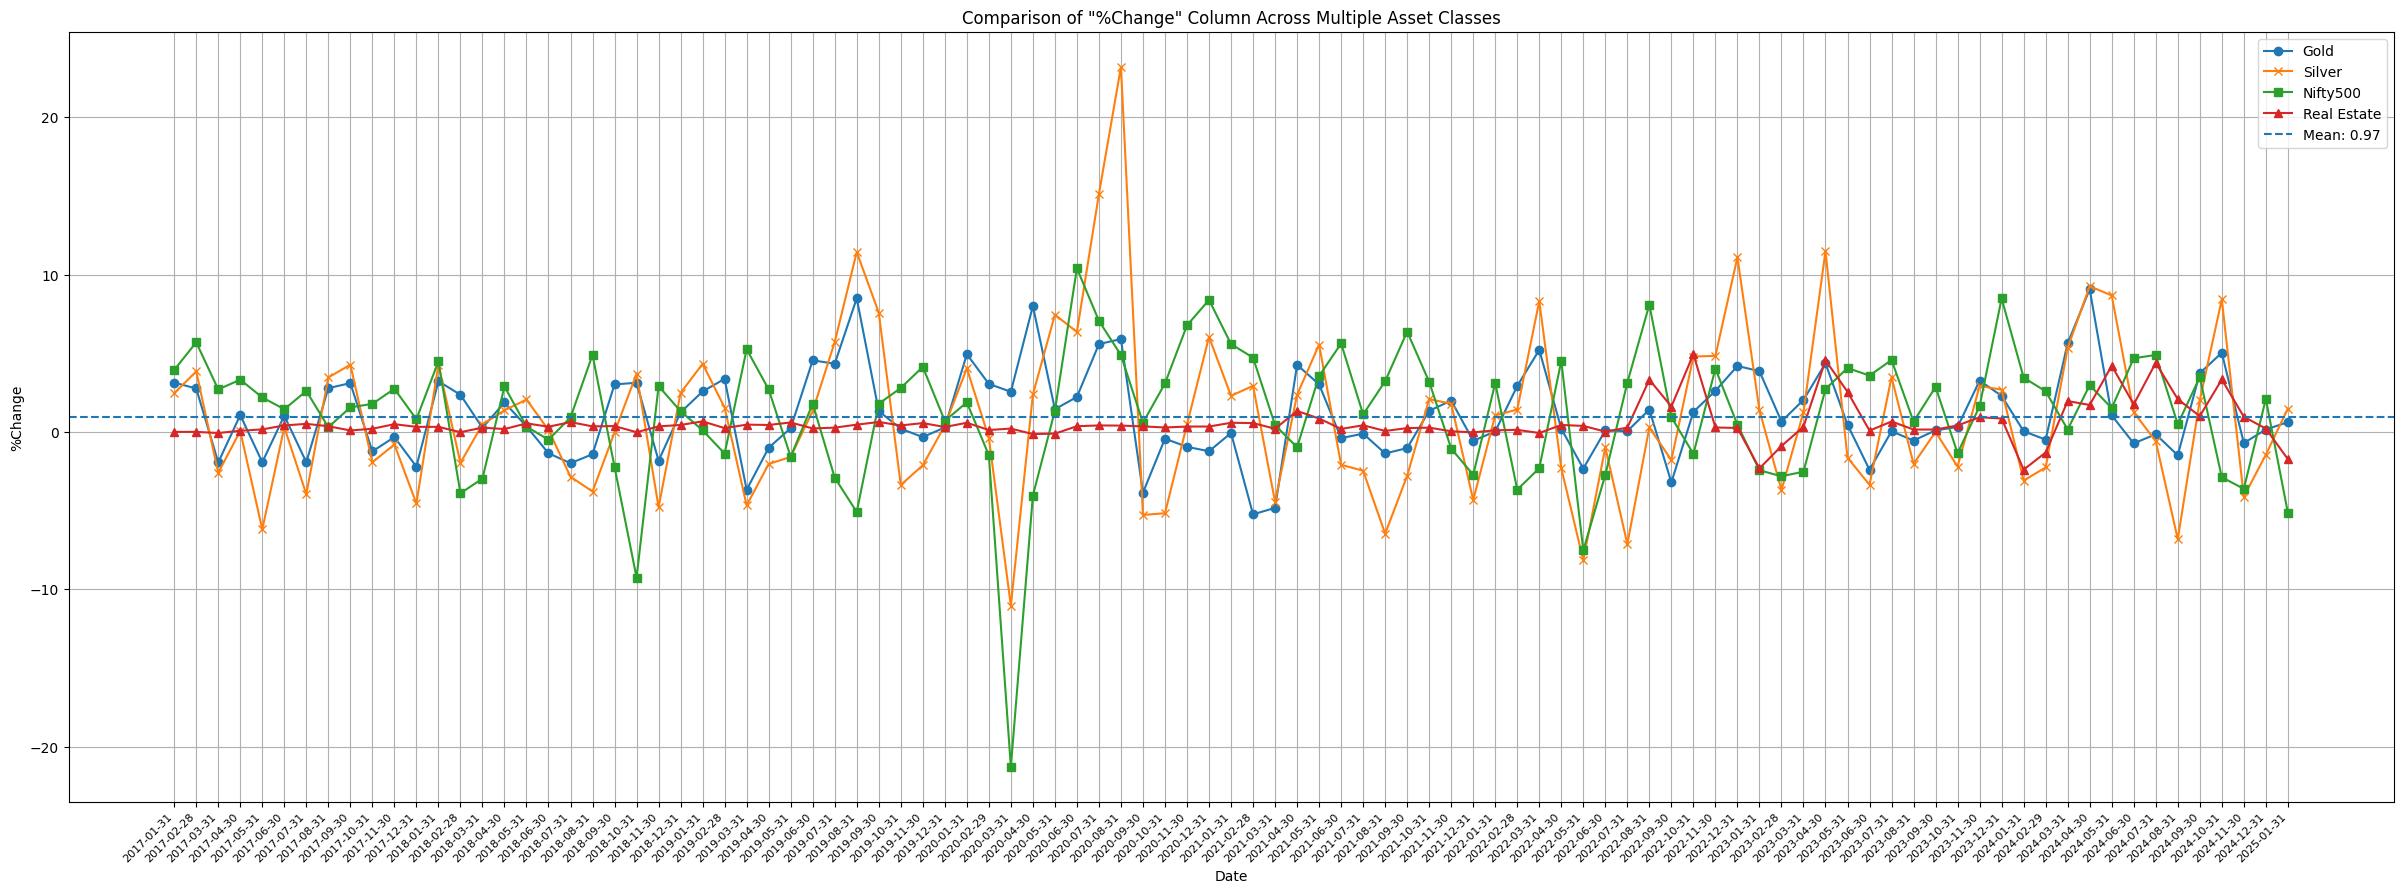

In [13]:
# Plot the 'Value' column from each DataFrame on the same axes
plt.figure(figsize=(30, 10))
plt.plot(df_gold_final['Date'], df_gold_final['%Chg'], label='Gold', marker='o')
plt.plot(df_silver_final['Date'], df_silver_final['%Chg'], label='Silver', marker='x')
plt.plot(df_nifty500_final['Date'], df_nifty500_final['%Chg'], label='Nifty500', marker='s')
plt.plot(df_real_estate_final['Date'], df_real_estate_final['%Chg'], label='Real Estate', marker='^')
plt.axhline(y=global_mean, linestyle='--', label=f'Mean: {global_mean:.2f}')
plt.xlabel('Date')
plt.ylabel('%Change')
plt.title('Comparison of "%Change" Column Across Multiple Asset Classes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=8)
mplcursors.cursor(hover=True)
plt.show()

[27-07-2025 13:55:34] [distfit.distfit] [INFO] fit
[27-07-2025 13:55:34] [distfit.distfit] [INFO] transform
[27-07-2025 13:55:34] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 0.0102802] [loc=1.096 scale=2.717]
[27-07-2025 13:55:34] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 0.0486647] [loc=-5.240 scale=6.336]
[27-07-2025 13:55:34] [distfit.distfit] [INFO] [pareto    ] [0.00 sec] [RSS: 0.0486647] [loc=-2147483653.240 scale=2147483648.000]
[27-07-2025 13:55:34] [distfit.distfit] [INFO] [dweibull  ] [0.02 sec] [RSS: 0.00562079] [loc=0.881 scale=2.359]
[27-07-2025 13:55:34] [distfit.distfit] [INFO] [t         ] [0.10 sec] [RSS: 0.0103134] [loc=1.031 scale=2.531]
[27-07-2025 13:55:34] [distfit.distfit] [INFO] [genextreme] [0.10 sec] [RSS: 0.0081458] [loc=0.008 scale=2.524]
[27-07-2025 13:55:34] [distfit.distfit] [INFO] [gamma     ] [0.03 sec] [RSS: 0.00844173] [loc=-13.526 scale=0.502]
[27-07-2025 13:55:34] [distfit.distfit] [INFO] [lognorm   ] [0.10 sec] [RSS: 0.00837

Text(0.5, 1.0, 'Real Estate Distribution')

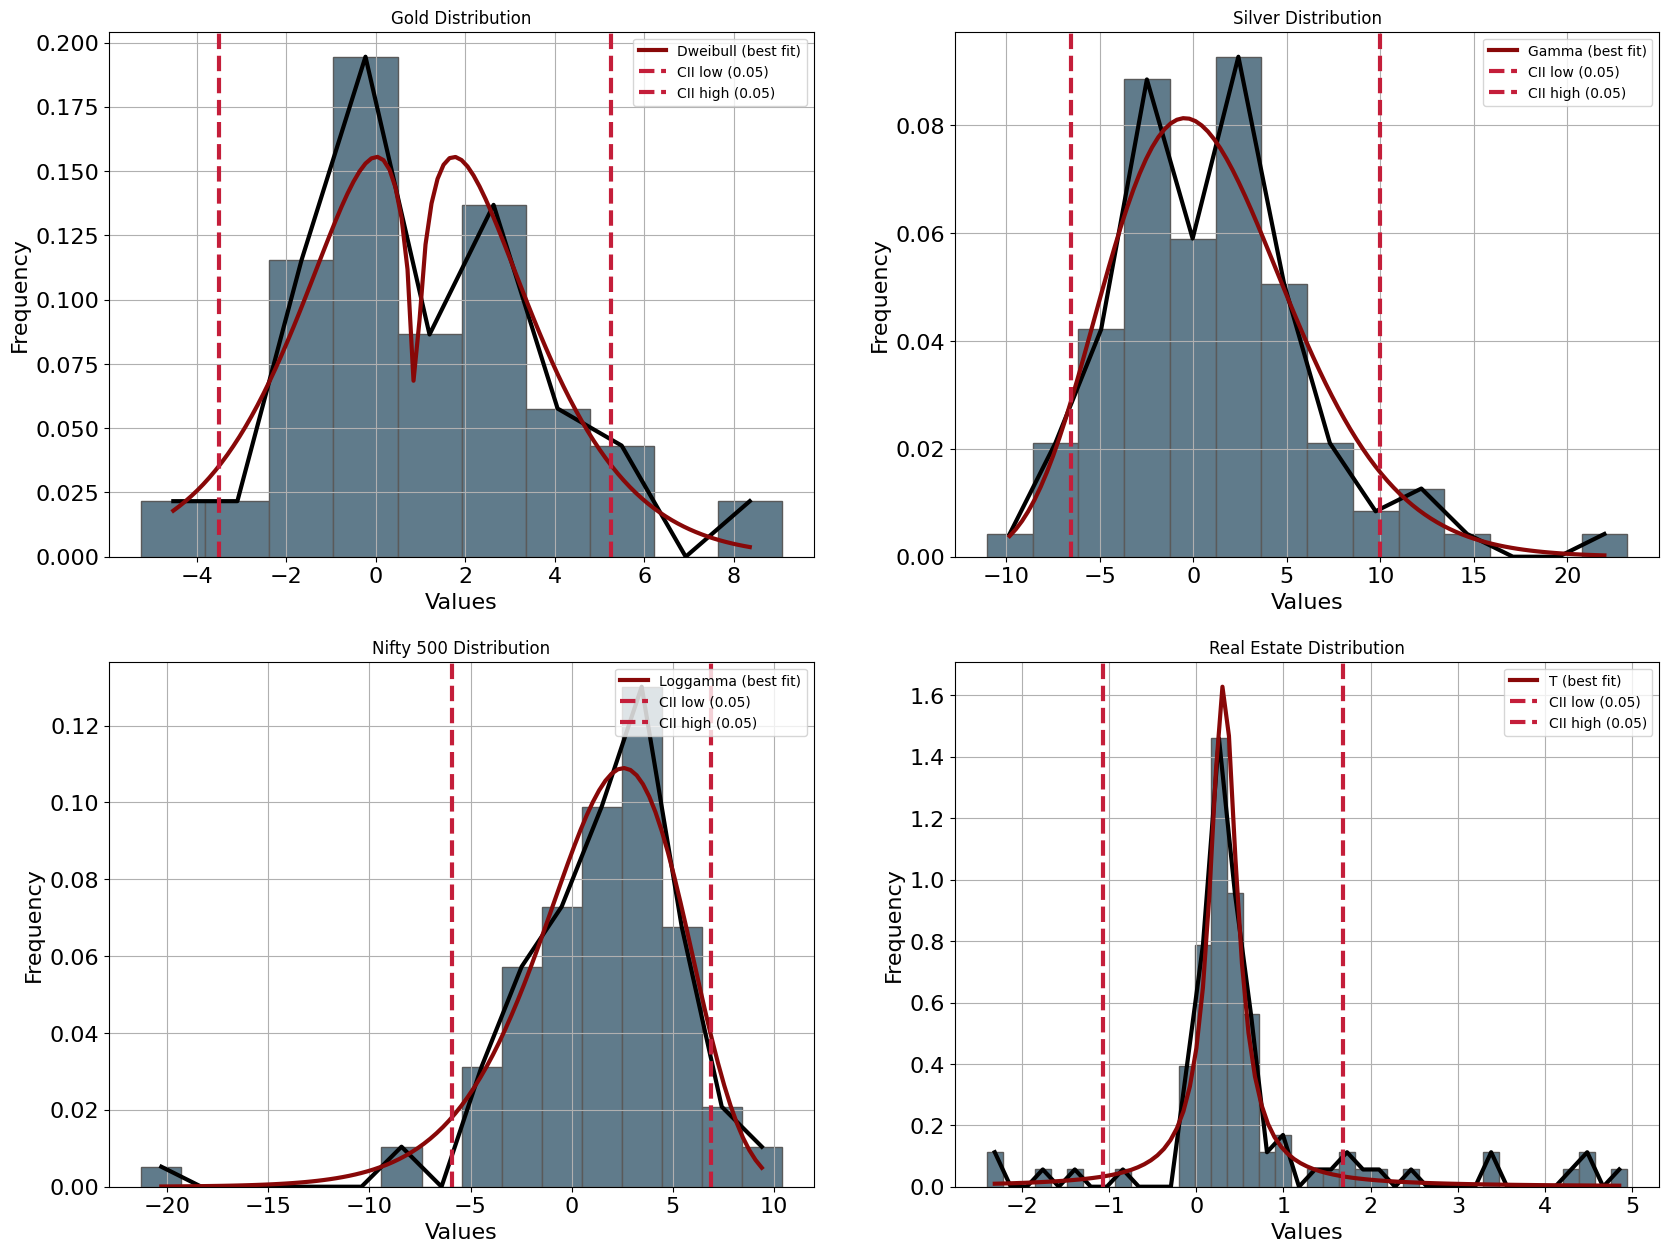

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
dfit = distfit()

model_results = dfit.fit_transform(df_gold_final['%Chg'])
dfit.plot(ax=axes[0,0])
axes[0,0].set_title('Gold Distribution')

model_results = dfit.fit_transform(df_silver_final['%Chg'])
dfit.plot(ax=axes[0,1])
axes[0,1].set_title('Silver Distribution')

model_results = dfit.fit_transform(df_nifty500_final['%Chg'])
dfit.plot(ax=axes[1,0])
axes[1,0].set_title('Nifty 500 Distribution')

model_results = dfit.fit_transform(df_real_estate_final['%Chg'])
dfit.plot(ax=axes[1,1])
axes[1,1].set_title('Real Estate Distribution')


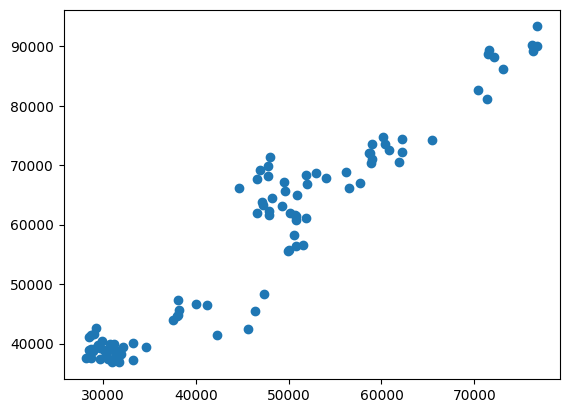

In [15]:
plt.scatter(df_gold_final['Price'],df_silver_final['Price'])

In [16]:
data = {'Date':df_gold_final['Date'],'Gold':df_gold_final['Price'],'Silver':df_silver_final['Price'],'Nifty500':df_nifty500_final['Price'],'RealEstate':df_real_estate_final['Price']}
df = pd.DataFrame(data)

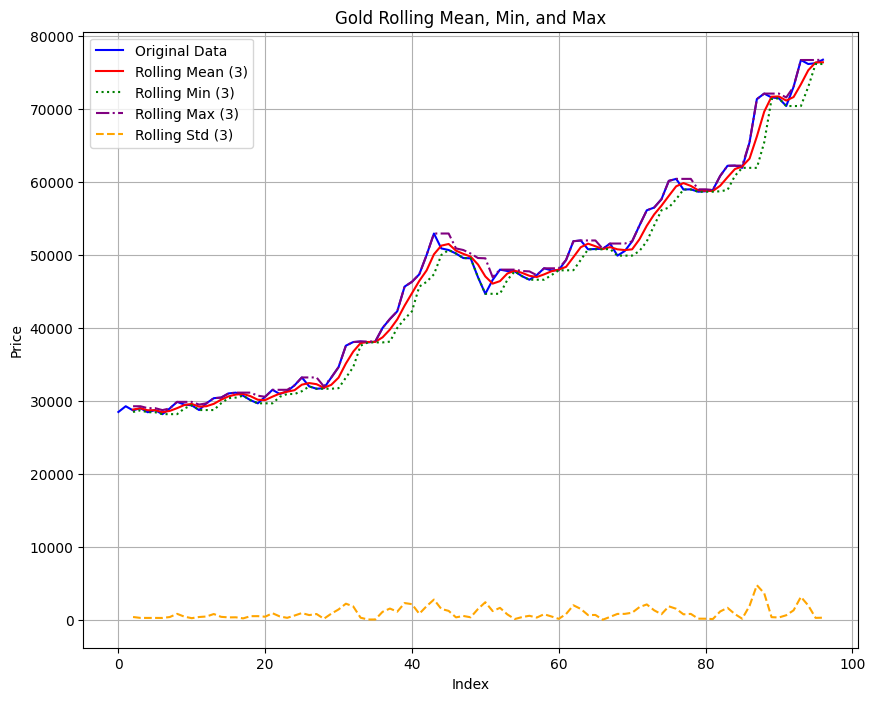

In [23]:
window_size = 3
df['GoldRollingMin'] = df['Gold'].rolling(window=win).min()
df['GoldRollingMax'] = df['Gold'].rolling(window=win).max()
df['GoldRollingMean'] = df['Gold'].rolling(window=win).mean()
df['GoldRollingStd'] = df['Gold'].rolling(window=win).std()

plt.figure(figsize=(10, 8)) # Set figure size for better visualization
plt.plot(df['Gold'], label='Original Data', color='blue')
plt.plot(df['GoldRollingMean'], label=f'Rolling Mean ({window_size})', color='red', linestyle='solid')
plt.plot(df['GoldRollingMin'], label=f'Rolling Min ({window_size})', color='green', linestyle=':')
plt.plot(df['GoldRollingMax'], label=f'Rolling Max ({window_size})', color='purple', linestyle='-.')
plt.plot(df['GoldRollingStd'], label=f'Rolling Std ({window_size})', color='orange', linestyle='--')

plt.title('Gold Rolling Mean, Min, and Max')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

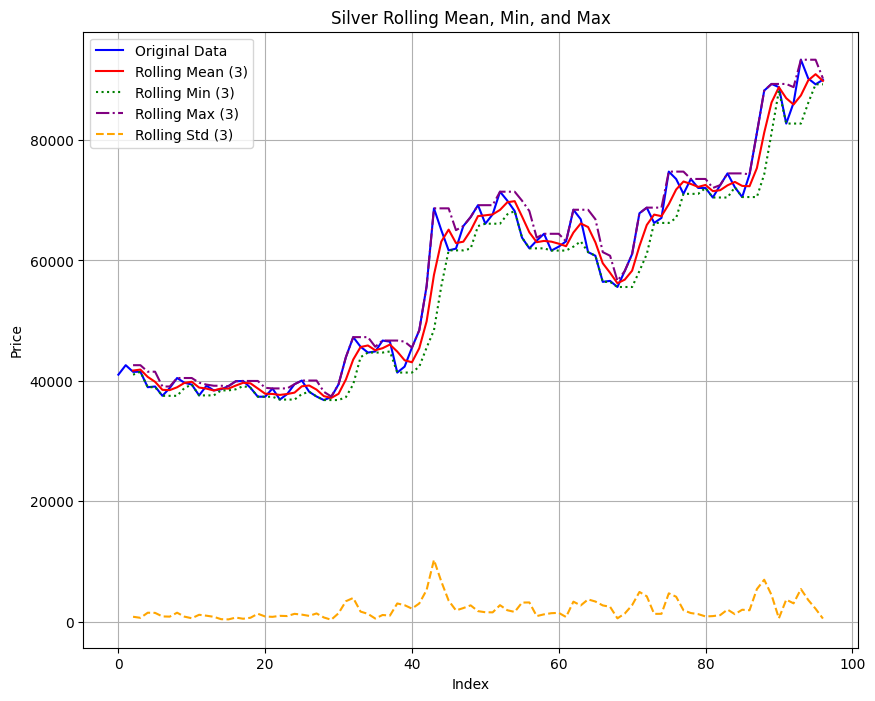

In [19]:
df['SilverRollingMin'] = df['Silver'].rolling(window=win).min()
df['SilverRollingMax'] = df['Silver'].rolling(window=win).max()
df['SilverRollingMean'] = df['Silver'].rolling(window=win).mean()
df['SilverRollingStd'] = df['Silver'].rolling(window=win).std()

plt.figure(figsize=(10, 8)) # Set figure size for better visualization
plt.plot(df['Silver'], label='Original Data', color='blue')
plt.plot(df['SilverRollingMean'], label=f'Rolling Mean ({window_size})', color='red', linestyle='solid')
plt.plot(df['SilverRollingMin'], label=f'Rolling Min ({window_size})', color='green', linestyle=':')
plt.plot(df['SilverRollingMax'], label=f'Rolling Max ({window_size})', color='purple', linestyle='-.')
plt.plot(df['SilverRollingStd'], label=f'Rolling Std ({window_size})', color='orange', linestyle='--')

plt.title('Silver Rolling Mean, Min, and Max')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

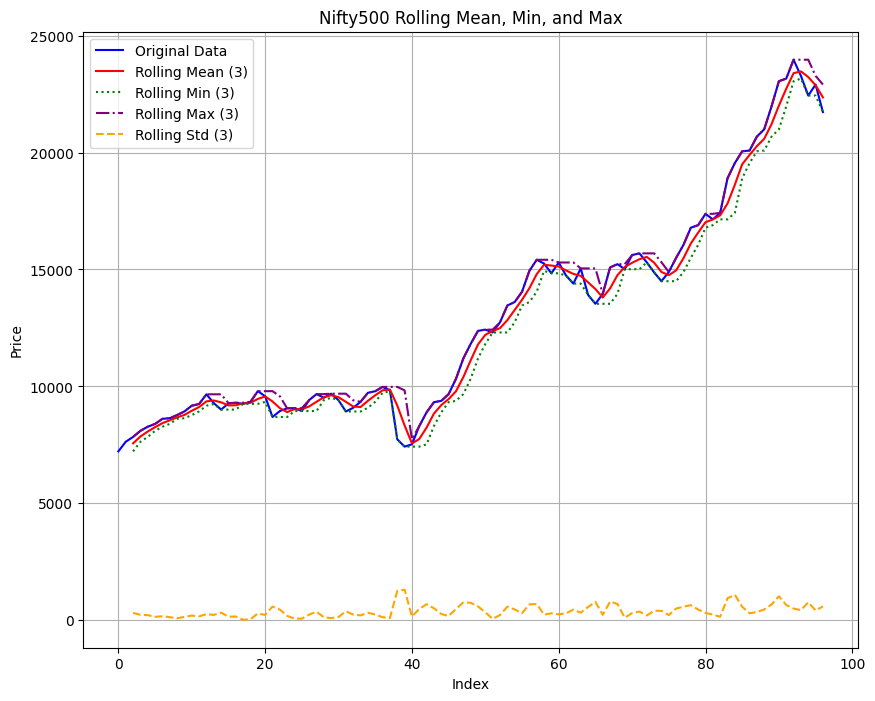

In [20]:
df['Nifty500RollingMin'] = df['Nifty500'].rolling(window=win).min()
df['Nifty500RollingMax'] = df['Nifty500'].rolling(window=win).max()
df['Nifty500RollingMean'] = df['Nifty500'].rolling(window=win).mean()
df['Nifty500RollingStd'] = df['Nifty500'].rolling(window=win).std()

plt.figure(figsize=(10, 8)) # Set figure size for better visualization
plt.plot(df['Nifty500'], label='Original Data', color='blue')
plt.plot(df['Nifty500RollingMean'], label=f'Rolling Mean ({window_size})', color='red', linestyle='solid')
plt.plot(df['Nifty500RollingMin'], label=f'Rolling Min ({window_size})', color='green', linestyle=':')
plt.plot(df['Nifty500RollingMax'], label=f'Rolling Max ({window_size})', color='purple', linestyle='-.')
plt.plot(df['Nifty500RollingStd'], label=f'Rolling Std ({window_size})', color='orange', linestyle='--')

plt.title('Nifty500 Rolling Mean, Min, and Max')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

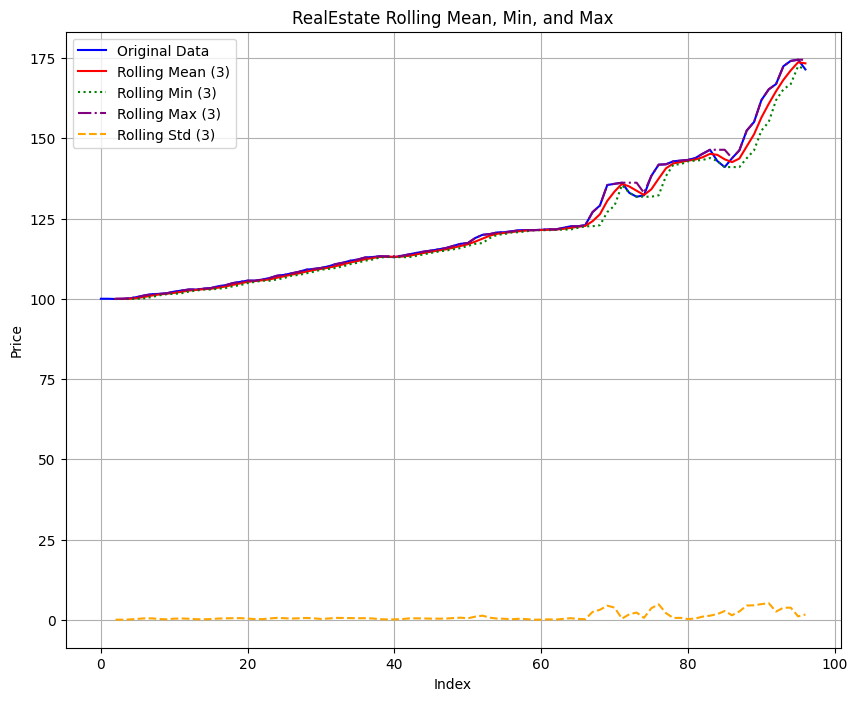

In [21]:
df['RealEstateRollingMin'] = df['RealEstate'].rolling(window=win).min()
df['RealEstateRollingMax'] = df['RealEstate'].rolling(window=win).max()
df['RealEstateRollingMean'] = df['RealEstate'].rolling(window=win).mean()
df['RealEstateRollingStd'] = df['RealEstate'].rolling(window=win).std()

plt.figure(figsize=(10, 8)) # Set figure size for better visualization
plt.plot(df['RealEstate'], label='Original Data', color='blue')
plt.plot(df['RealEstateRollingMean'], label=f'Rolling Mean ({window_size})', color='red', linestyle='solid')
plt.plot(df['RealEstateRollingMin'], label=f'Rolling Min ({window_size})', color='green', linestyle=':')
plt.plot(df['RealEstateRollingMax'], label=f'Rolling Max ({window_size})', color='purple', linestyle='-.')
plt.plot(df['RealEstateRollingStd'], label=f'Rolling Std ({window_size})', color='orange', linestyle='--')

plt.title('RealEstate Rolling Mean, Min, and Max')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

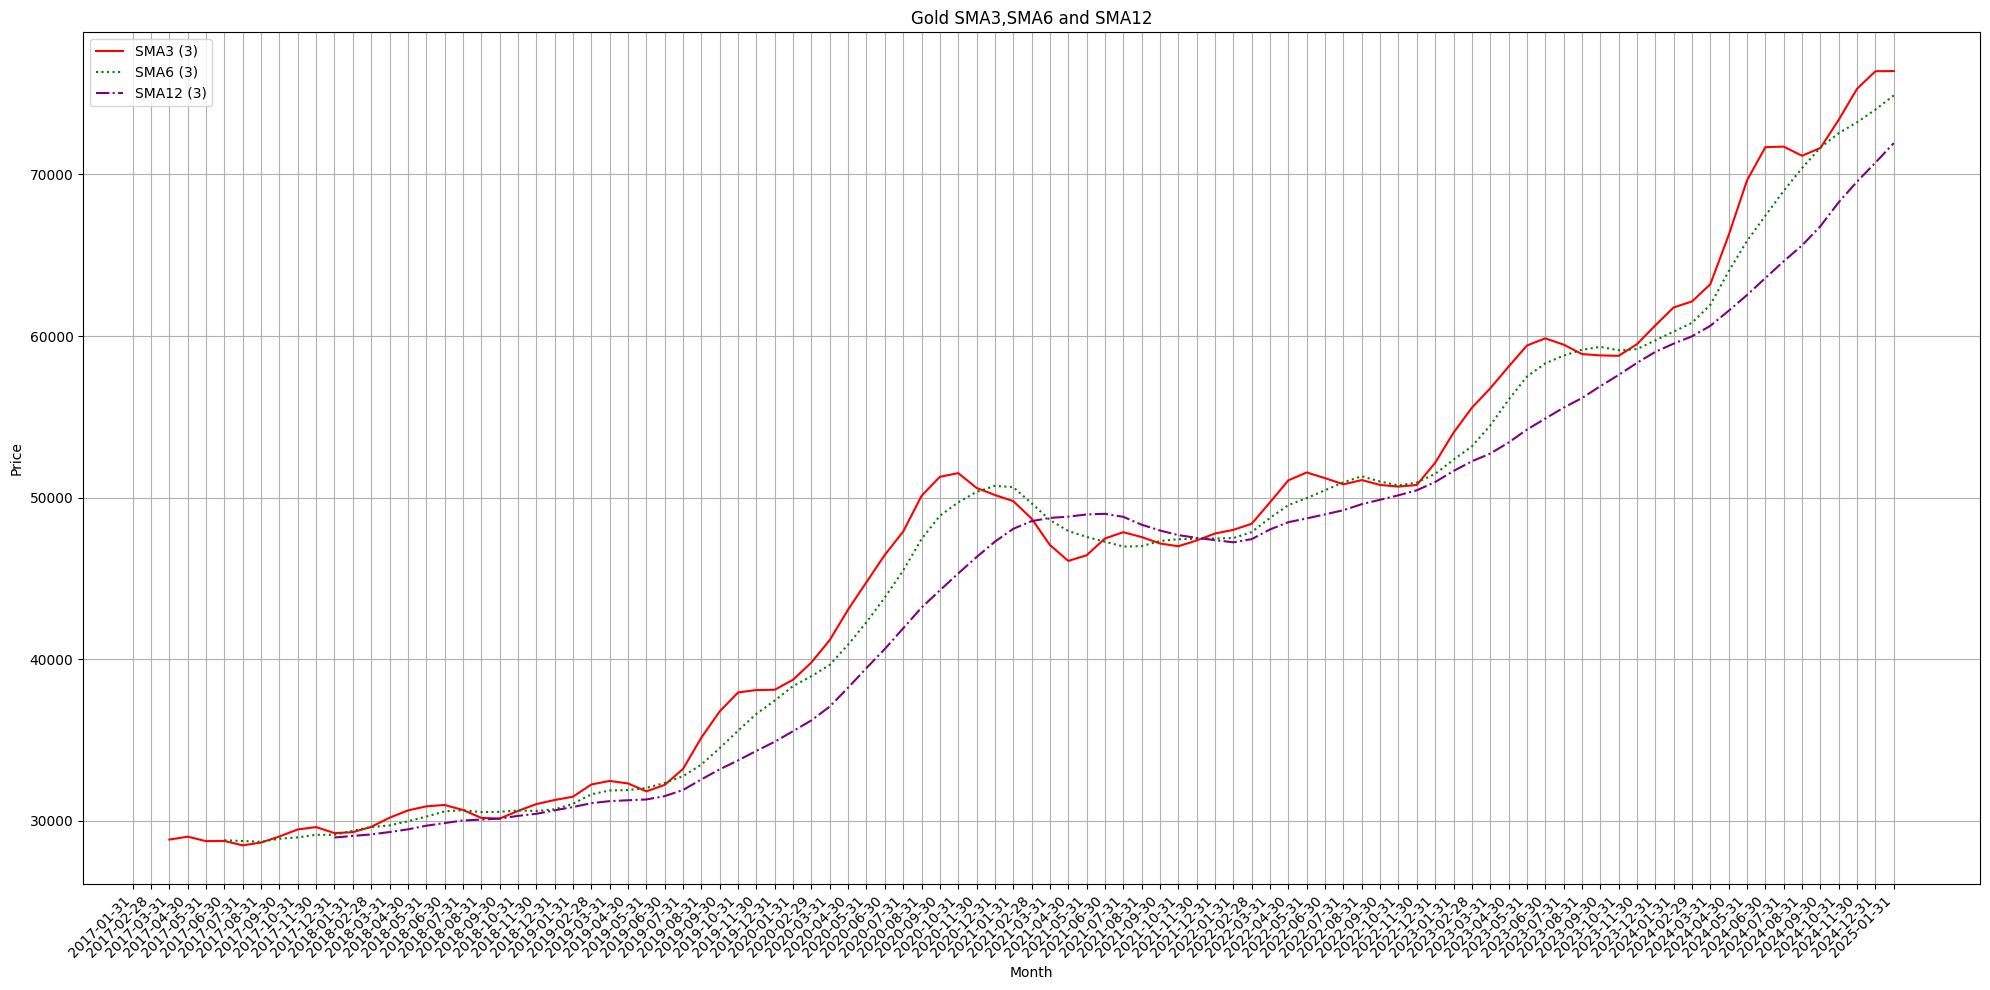

In [47]:
data = {'Date':df_gold_final['Date'],'Price':df_gold_final['Price']}
df_gold = pd.DataFrame(data)
df_gold.set_index('Date')

#Create 3,6,12 rolling windows to study the Simple Moving Averages(SMA)
df_gold['SMA3'] = df_gold['Price'].rolling(window=3).mean()
df_gold['SMA6'] = df_gold['Price'].rolling(window=6).mean()
df_gold['SMA12'] = df_gold['Price'].rolling(window=12).mean()

plt.figure(figsize=(20, 10)) # Set figure size for better visualization
# plt.plot(df_gold['Price'], label='Original Data', color='blue')
plt.plot(df_gold['Date'],df_gold['SMA3'], label=f'SMA3 ({window_size})', color='red', linestyle='solid')
plt.plot(df_gold['Date'],df_gold['SMA6'], label=f'SMA6 ({window_size})', color='green', linestyle=':')
plt.plot(df_gold['Date'],df_gold['SMA12'], label=f'SMA12 ({window_size})', color='purple', linestyle='-.')

plt.title('Gold SMA3,SMA6 and SMA12')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
df_gold.index

RangeIndex(start=0, stop=97, step=1)

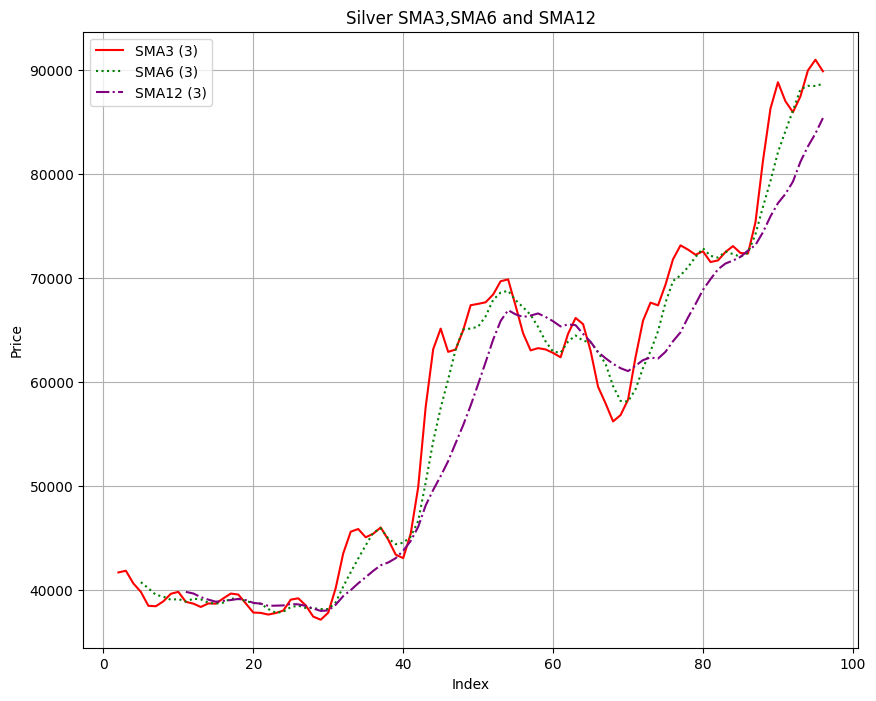

In [35]:
data = {'Date':df_silver_final['Date'],'Price':df_silver_final['Price']}
df_silver = pd.DataFrame(data)

#Create 3,6,12 rolling windows to study the Simple Moving Averages(SMA)
df_silver['SMA3'] = df_silver['Price'].rolling(window=3).mean()
df_silver['SMA6'] = df_silver['Price'].rolling(window=6).mean()
df_silver['SMA12'] = df_silver['Price'].rolling(window=12).mean()

plt.figure(figsize=(10, 8)) # Set figure size for better visualization
# plt.plot(df_silver['Price'], label='Original Data', color='blue')
plt.plot(df_silver['SMA3'], label=f'SMA3 ({window_size})', color='red', linestyle='solid')
plt.plot(df_silver['SMA6'], label=f'SMA6 ({window_size})', color='green', linestyle=':')
plt.plot(df_silver['SMA12'], label=f'SMA12 ({window_size})', color='purple', linestyle='-.')

plt.title('Silver SMA3,SMA6 and SMA12')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

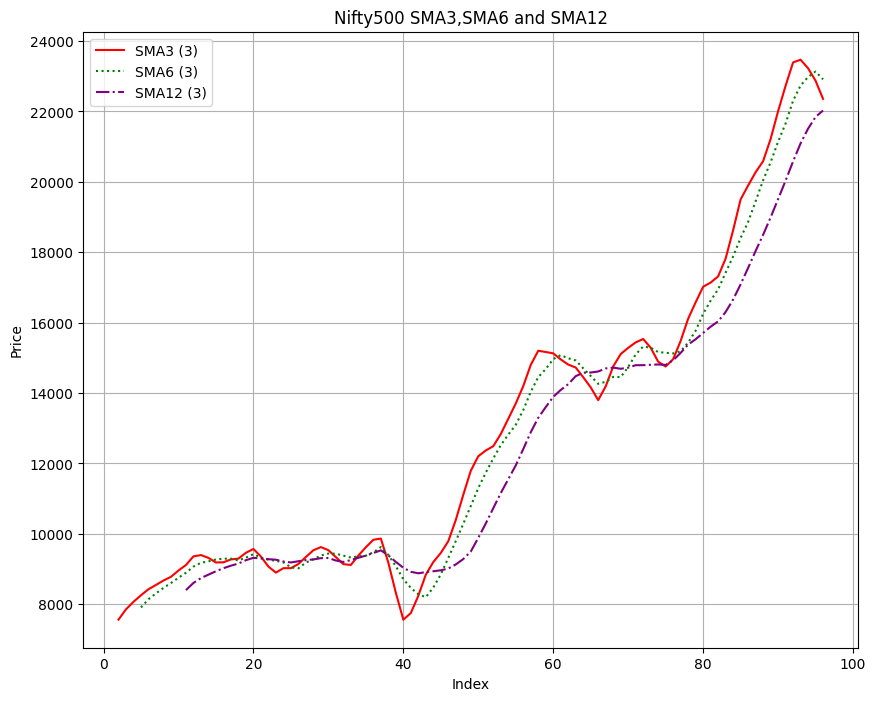

In [36]:
data = {'Date':df_nifty500_final['Date'],'Price':df_nifty500_final['Price']}
df_nifty500 = pd.DataFrame(data)

#Create 3,6,12 rolling windows to study the Simple Moving Averages(SMA)
df_nifty500['SMA3'] = df_nifty500['Price'].rolling(window=3).mean()
df_nifty500['SMA6'] = df_nifty500['Price'].rolling(window=6).mean()
df_nifty500['SMA12'] = df_nifty500['Price'].rolling(window=12).mean()

plt.figure(figsize=(10, 8)) # Set figure size for better visualization
# plt.plot(df_nifty500['Price'], label='Original Data', color='blue')
plt.plot(df_nifty500['SMA3'], label=f'SMA3 ({window_size})', color='red', linestyle='solid')
plt.plot(df_nifty500['SMA6'], label=f'SMA6 ({window_size})', color='green', linestyle=':')
plt.plot(df_nifty500['SMA12'], label=f'SMA12 ({window_size})', color='purple', linestyle='-.')

plt.title('Nifty500 SMA3,SMA6 and SMA12')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

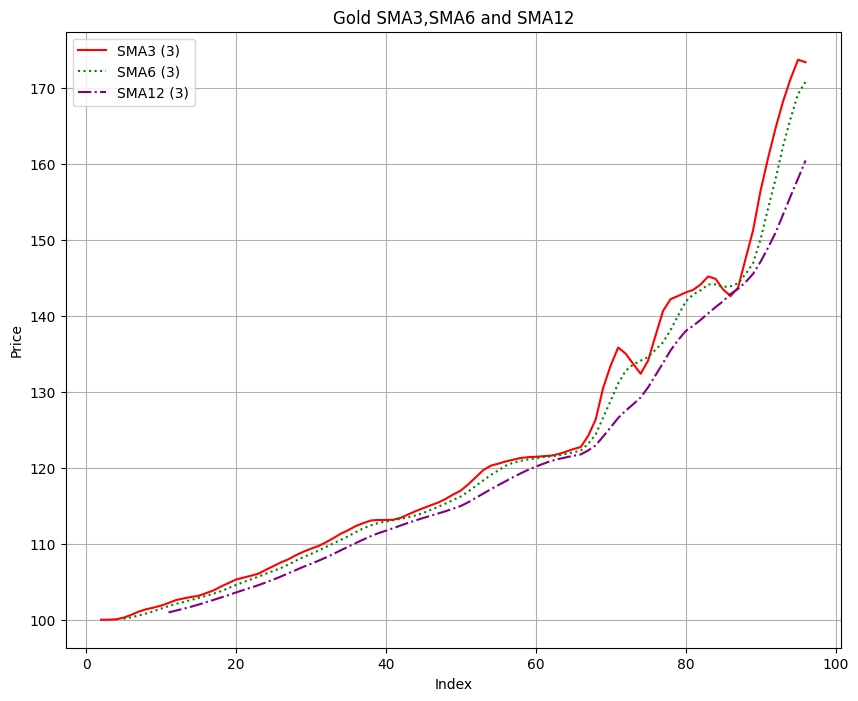

In [37]:
data = {'Date':df_real_estate_final['Date'],'Price':df_real_estate_final['Price']}
df_real_estate = pd.DataFrame(data)

#Create 3,6,12 rolling windows to study the Simple Moving Averages(SMA)
df_real_estate['SMA3'] = df_real_estate['Price'].rolling(window=3).mean()
df_real_estate['SMA6'] = df_real_estate['Price'].rolling(window=6).mean()
df_real_estate['SMA12'] = df_real_estate['Price'].rolling(window=12).mean()

plt.figure(figsize=(10, 8)) # Set figure size for better visualization
# plt.plot(df_real_estate['Price'], label='Original Data', color='blue')
plt.plot(df_real_estate['SMA3'], label=f'SMA3 ({window_size})', color='red', linestyle='solid')
plt.plot(df_real_estate['SMA6'], label=f'SMA6 ({window_size})', color='green', linestyle=':')
plt.plot(df_real_estate['SMA12'], label=f'SMA12 ({window_size})', color='purple', linestyle='-.')

plt.title('Gold SMA3,SMA6 and SMA12')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
data = {'Gold':df['Gold'],'Silver':df['Silver']}
df_gold_silver = pd.DataFrame(data)
df_gold_silver.corr()

,Gold,Silver
Gold,1.000000,0.959743
Silver,0.959743,1.000000


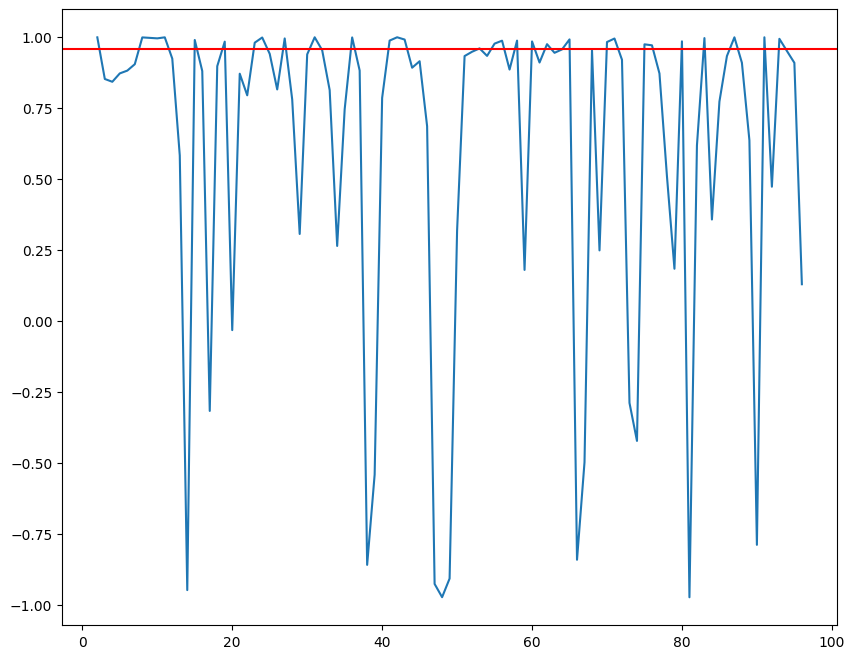

In [64]:
ax = df['Gold'].rolling(window=3).corr(df['Silver']).plot(figsize=(10,8))
ax.axhline(df_gold_silver.corr().iloc[0,1],color='red')

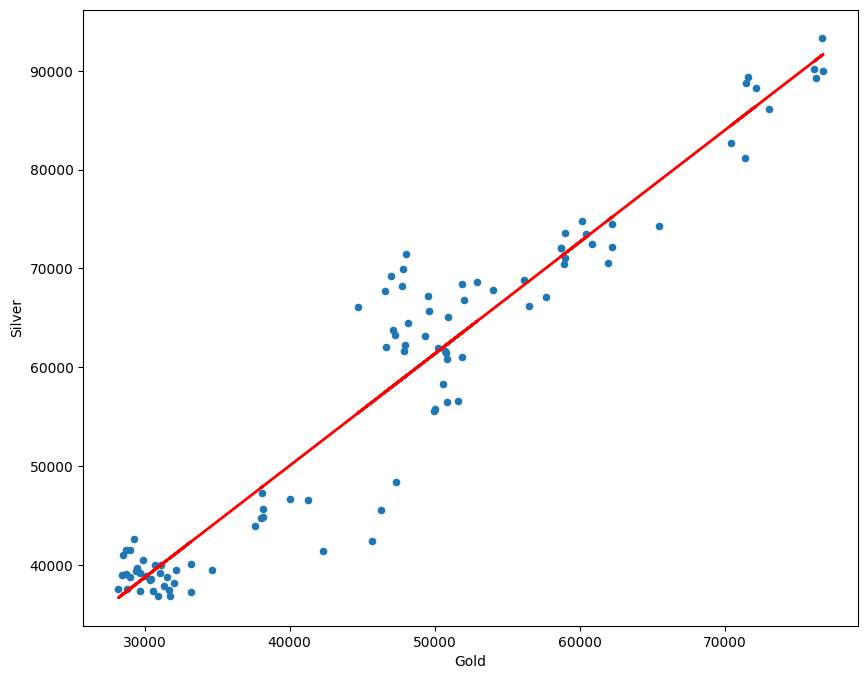

In [68]:
reg = np.polyfit(df_gold_silver['Gold'],df_gold_silver['Silver'],deg=1)
ax = df_gold_silver.plot(kind='scatter',x='Gold',y='Silver',figsize=(10,8))
ax.plot(df_gold_silver['Gold'],np.polyval(reg,df_gold_silver['Gold']),'r',lw=2)